In [2]:
from google.colab import files
uploaded = files.upload()

Saving sonar.csv to sonar (1).csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score

In [5]:
df = pd.read_csv('sonar.csv')

In [6]:
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [7]:
df.tail()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
206,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [8]:
df.isnull().sum()

,0
0.0200,0
0.0371,0
0.0428,0
0.0207,0
0.0954,0
...,...
0.0180,0
0.0084,0
0.0090,0
0.0032,0


In [9]:
feature_names = ['feat' + str(i) for i in range(1, 61)]
df.columns = feature_names + ['label']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   feat1   207 non-null    float64
 1   feat2   207 non-null    float64
 2   feat3   207 non-null    float64
 3   feat4   207 non-null    float64
 4   feat5   207 non-null    float64
 5   feat6   207 non-null    float64
 6   feat7   207 non-null    float64
 7   feat8   207 non-null    float64
 8   feat9   207 non-null    float64
 9   feat10  207 non-null    float64
 10  feat11  207 non-null    float64
 11  feat12  207 non-null    float64
 12  feat13  207 non-null    float64
 13  feat14  207 non-null    float64
 14  feat15  207 non-null    float64
 15  feat16  207 non-null    float64
 16  feat17  207 non-null    float64
 17  feat18  207 non-null    float64
 18  feat19  207 non-null    float64
 19  feat20  207 non-null    float64
 20  feat21  207 non-null    float64
 21  feat22  207 non-null    float64
 22  fe

In [11]:
df['label'] = df['label'].map({'R': 0, 'M': 1})

In [12]:
X = df[feature_names].values
y = df['label'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
param_grid = {
    'hidden_layer_sizes': [(6,), (12,), (24,), (12, 6)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd']
}

In [16]:
mlp = MLPClassifier(max_iter=300, random_state=42)

grid seach cv



             
             
            n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(6,), (12,), (24,), (12, 6)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy'

In [17]:
grid = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=300, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(6,), (12,), (24,), (12, 6)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['adam', 'sgd']},
             scoring='accuracy')

In [18]:
print("Bests:", grid.best_params_)
print("Best validation acc: {:.2f}%".format(grid.best_score_ * 100))

Bests: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (24,), 'learning_rate_init': 0.01, 'solver': 'adam'}
Best validation acc: 85.45%


In [19]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy: {:.2f}%".format(test_accuracy * 100))

Test Set Accuracy: 90.48%


In [20]:
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print("AUC Score: {:.2f}".format(roc_auc))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("F1-Score: {:.2f}".format(f1))

AUC Score: 0.96
F1-Score: 0.91


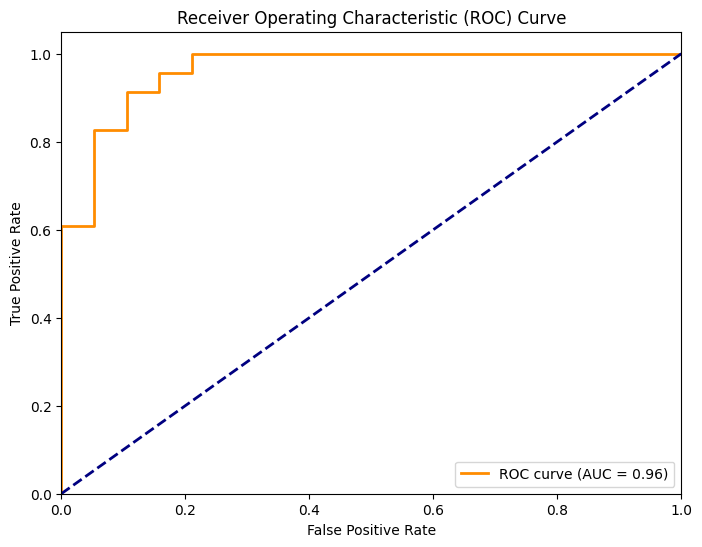

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

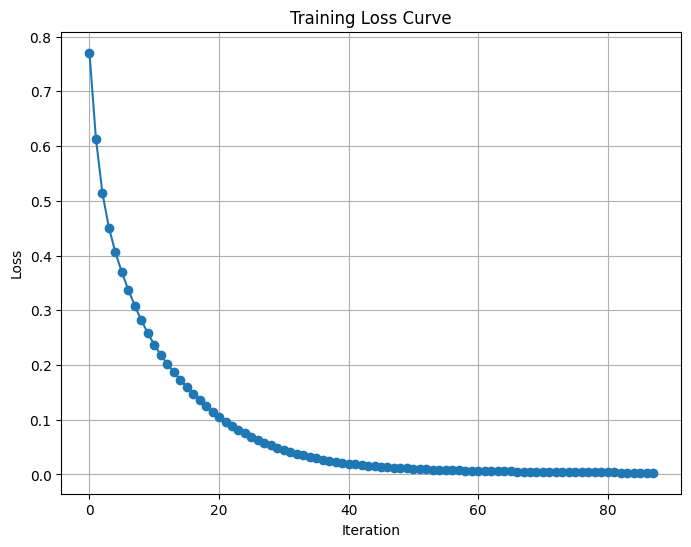

In [23]:
if hasattr(best_model, "loss_curve_"):
    plt.figure(figsize=(8, 6))
    plt.plot(best_model.loss_curve_, marker='o')
    plt.title('Training Loss Curve')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()


In [24]:
!pip install nbconvert